## Lucas Mauge


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.ticker as ticker
df = pd.read_excel('https://www.oliviergueant.com/uploads/4/3/0/9/4309511/sbf120_as_of_end_2018.xlsx', sheet_name=None)
companies = df['Compo 31122018'].copy()
dataset = df['Data'].copy()
dataset

,QDT FP Equity,PX_LAST,MARKETCAP,DIM FP Equity,PX_LAST.1,MARKETCAP.1,RUI FP Equity,PX_LAST.2,MARKETCAP.2,OR FP Equity,...,MARKETCAP.116,ATE FP Equity,PX_LAST.117,MARKETCAP.117,WLN FP Equity,PX_LAST.118,MARKETCAP.118,NXI FP Equity,PX_LAST.119,MARKETCAP.119
0,40543,65.20,2074.1424,40543,6.28,640.6889,40543,21.1225,1224.8148,40543,...,7045.2320,40543,24.585,785.1392,41816.0,16.4,NaN,40543,26.4957,1770.6669
1,40546,65.41,2080.8229,40546,6.29,641.5386,40546,21.3261,1236.6203,40546,...,7356.5732,40546,24.700,788.8118,41817.0,16.4,2160.9760,40546,26.8603,1795.0327
2,40547,66.54,2116.7705,40547,6.28,640.6889,40547,21.3770,1239.5716,40547,...,7370.2285,40547,25.090,801.2667,41820.0,16.6,2187.3294,40547,27.2288,1819.6576
3,40548,66.51,2115.8161,40548,6.29,641.3687,40548,21.6896,1257.7014,40548,...,7544.1062,40548,25.000,798.3925,41821.0,16.4,2160.9760,40548,27.1047,1811.3629
4,40549,67.56,2149.2187,40549,6.30,642.3883,40549,21.6920,1257.8420,40549,...,7652.4383,40549,25.450,812.7636,41822.0,16.3,2147.7993,40549,27.1861,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,44440,23.72,819.8323,44440,524.20,48320.8556,44440,33.2700,3459.1215,44440,...,34554.1988,44440,138.700,4765.8506,NaN,NaN,NaN,44440,43.5800,2446.1334
2730,44441,23.76,821.2148,44441,532.60,49095.1692,44441,33.2000,3451.8435,44441,...,34567.8674,44441,139.900,4807.0836,NaN,NaN,NaN,44441,43.3600,2433.7848
2731,44442,23.28,804.6246,44442,531.00,48947.6809,44442,32.9700,3427.9301,44442,...,34535.9740,44442,139.800,4803.6475,NaN,NaN,NaN,44442,43.6600,2450.6237
2732,44445,22.80,788.0344,44445,542.40,49998.5351,44445,33.0000,3431.0493,44445,...,34804.7896,44445,138.700,4765.8506,NaN,NaN,NaN,44445,43.6200,2448.3786


In [48]:
date_columns = [3*i for i in range(120)]
print(date_columns)
for i in date_columns:
    dataset.iloc[:,i] = pd.to_datetime(dataset.iloc[:,i].astype(float), origin='1899-12-30', unit='D')

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357]


In [49]:
dfs = []
dfm=[]
# Loop through the 120 sets of 3 columns (each set has a date, price, and an extra column)
for i in range(0, 360, 3):
    # Extract the relevant date and price columns
    date_col = dataset.iloc[:, i]  # Date column
    price_col = dataset.iloc[:, i+1]  # Price column
    market_col=dataset.iloc[:,i+2]
    # Create a temporary DataFrame with these two columns
    temp_df = pd.DataFrame({
        'Date': pd.to_datetime(date_col, errors='coerce'),  
        f'{dataset.columns[i]}': price_col # Rename the price column to indicate the set number
    })
    temp_df.dropna(inplace=True) # added to clean
    temp_df.set_index('Date', inplace=True) # set_index done in class to make a join and not a merge
    
    # Append the DataFrame to the list
    dfs.append(temp_df)
    temp1_df = pd.DataFrame({
        'Date': pd.to_datetime(date_col, errors='coerce'),  
        f'{dataset.columns[i]}': market_col
    })
    temp1_df.dropna(inplace=True) # added to clean
    temp1_df.set_index('Date', inplace=True) # set_index done in class to make a join and not a merge
    
    # Append the DataFrame to the list
    dfm.append(temp1_df)

In [50]:
df_px = dfs[0]
for i in range(1,120):
    df_px = df_px.join(dfs[i], how='outer')
df_px

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,65.20,6.28,21.1225,83.08,40.2799,NaN,145.441,15.1940,39.650,5.642,...,30.1261,NaN,52.0002,15.6662,70.36,51.1749,7.739,24.585,NaN,26.4957
2011-01-03,65.41,6.29,21.3261,85.50,41.3097,NaN,147.799,15.4988,40.590,5.672,...,30.6517,NaN,52.3960,15.7219,71.13,51.4648,8.081,24.700,NaN,26.8603
2011-01-04,66.54,6.28,21.3770,85.04,41.0176,NaN,146.669,15.5635,41.130,5.711,...,30.2093,NaN,52.0485,15.7191,69.90,51.2522,8.096,25.090,NaN,27.2288
2011-01-05,66.51,6.29,21.6896,84.66,40.4730,NaN,144.900,15.6651,41.290,5.669,...,30.4513,NaN,51.4500,16.0007,68.90,52.0833,8.287,25.000,NaN,27.1047
2011-01-06,67.56,6.30,21.6920,84.57,39.9878,NaN,143.721,15.8128,41.550,5.689,...,30.4778,NaN,51.5465,15.8669,68.74,51.3198,8.406,25.450,NaN,27.1861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,23.72,524.20,33.2700,399.50,93.7500,11.88,73.580,33.8600,37.100,49.155,...,45.7400,19.47,111.5500,9.9900,184.55,170.0000,37.920,138.700,75.99,43.5800
2021-09-02,23.76,532.60,33.2000,400.15,92.9800,11.86,72.250,32.4000,37.580,49.020,...,45.5000,19.33,111.1000,9.7000,186.05,170.9000,37.935,139.900,75.01,43.3600
2021-09-03,23.28,531.00,32.9700,394.85,91.1400,11.68,70.140,31.5800,37.265,48.790,...,45.1800,19.09,111.3500,9.6100,183.70,168.6000,37.900,139.800,72.39,43.6600


In [51]:
df_mcap = dfm[0]
for i in range(1,120):
    df_mcap = df_mcap.join(dfm[i], how='outer')
df_mcap

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,2074.1424,640.6889,1224.8148,49784.4831,22463.6902,NaN,13574.0125,528.1141,93138.4018,6750.9914,...,2782.3078,NaN,3305.5440,2584.3429,18592.8190,2603.4359,7045.2320,785.1392,NaN,1770.6669
2011-01-03,2080.8229,641.5386,1236.6203,51234.6330,23037.9831,NaN,13794.1317,538.7085,95346.4749,6786.8882,...,2830.8446,NaN,3330.7022,2593.5398,18796.2935,2618.1862,7356.5732,788.8118,NaN,1795.0327
2011-01-04,2116.7705,640.6889,1239.5716,50958.9847,22875.0827,NaN,13688.6579,540.9557,96614.9424,6833.5541,...,2789.9899,NaN,3308.6121,2593.0800,18471.2627,2607.3693,7370.2285,801.2667,NaN,1819.6576
2011-01-05,2115.8161,641.3687,1257.7014,50731.2752,22571.3701,NaN,13523.5686,544.4872,96990.7846,6783.2985,...,2812.3359,NaN,3270.5679,2639.5246,18207.0100,2649.6536,7544.1062,798.3925,NaN,1811.3629
2011-01-06,2149.2187,642.3883,1257.8420,50677.3440,22317.5758,NaN,13413.5090,549.6239,97601.5282,6807.2297,...,2814.7802,NaN,3276.7041,2617.4519,18164.7296,2610.8110,7652.4383,812.7636,NaN,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,819.8323,48320.8556,3459.1215,222789.8633,56029.0137,4800.7512,10197.7771,3575.3571,97959.9281,65402.6198,...,5031.0874,880.8597,8559.9539,937.9261,48329.3191,8589.5157,34554.1988,4765.8506,21312.5103,2446.1334
2021-09-02,821.2148,49095.1692,3451.8435,223152.3500,55568.8288,4792.6692,10013.4466,3421.1922,99227.3342,65222.9971,...,5004.6891,874.5258,8525.4225,910.6991,48722.1340,8634.9896,34567.8674,4807.0836,21037.6549,2433.7848
2021-09-03,804.6246,48947.6809,3427.9301,220196.6897,54469.1660,4719.9305,9721.0123,3334.6065,98395.5989,64916.9733,...,4969.4912,863.6678,8544.6066,902.2493,48106.7241,8518.7785,34535.9740,4803.6475,20302.8375,2450.6237


In [52]:
for col in df_px.columns:
    # Find the first and last non-NaN index for each column
    first_valid_idx = df_px[col].first_valid_index()
    last_valid_idx = df_px[col].last_valid_index()
    
    # If there are valid indices (i.e., the column is not entirely NaN)
    if first_valid_idx is not None and last_valid_idx is not None:
        # Apply forward fill only between the first and last valid indices
        df_px.loc[first_valid_idx:last_valid_idx, col] = df_px.loc[first_valid_idx:last_valid_idx, col].bfill() # chatgpt did ffill. Always take care

# Now df will have NaNs untouched at the beginning and end, but intermediate NaNs will be filled with the previous known value


In [53]:
for col in df_mcap.columns:
    # Find the first and last non-NaN index for each column
    first_valid_idx = df_mcap[col].first_valid_index()
    last_valid_idx = df_mcap[col].last_valid_index()
    
    # If there are valid indices (i.e., the column is not entirely NaN)
    if first_valid_idx is not None and last_valid_idx is not None:
        # Apply forward fill only between the first and last valid indices
        df_mcap.loc[first_valid_idx:last_valid_idx, col] = df_mcap.loc[first_valid_idx:last_valid_idx, col].bfill() # chatgpt did ffill. Always take care

# Now df will have NaNs untouched at the beginning and end, but intermediate NaNs will be filled with the previous known value

In [54]:
end_2018_cap = df_mcap.loc['2018-12-31']
df=pd.DataFrame(end_2018_cap)
df.sort_values('2018-12-31', ascending=False, inplace=True)
df_px10 = df_px[df.head(10).index]
df_mcap10 = df_mcap[df.head(10).index]

In [55]:
df_px10

,MC FP Equity,TTE FP Equity,OR FP Equity,SAN FP Equity,AIR FP Equity,KER FP Equity,RMS FP Equity,BNP FP Equity,EL FP Equity,AI FP Equity
Date,,,,,,,,,,
2010-12-31,110.94,39.650,83.08,47.85,17.440,108.89,150.422,47.610,48.175,62.9605
2011-01-03,112.07,40.590,85.50,49.39,17.785,110.95,150.950,49.335,48.480,63.9052
2011-01-04,109.54,41.130,85.04,49.69,17.930,109.39,152.245,50.000,48.965,63.7322
2011-01-05,107.97,41.290,84.66,49.84,18.390,108.61,151.669,50.150,48.750,63.2000
2011-01-06,109.86,41.550,84.57,50.28,19.080,107.88,148.790,49.835,48.395,62.0624
...,...,...,...,...,...,...,...,...,...,...
2021-09-01,646.80,37.100,399.50,88.13,118.000,688.20,1270.000,54.800,167.500,152.7600
2021-09-02,647.00,37.580,400.15,88.20,116.780,695.60,1271.500,54.800,168.900,151.7600
2021-09-03,634.90,37.265,394.85,87.85,114.480,683.30,1255.000,53.870,166.460,151.1400


In [56]:
# Filter data for 2019
df_px10_2019 = df_px10.loc['2019-01-01':'2019-12-31']

df_px10_2017_2018 = df_px10.loc['2017-01-01':'2018-12-31']
daily_returns_2019 = df_px10_2019.pct_change().dropna()
daily_returns_2017_2018 = df_px10_2017_2018.pct_change().dropna()
# Initial data
V0 = 1_000_000  # Initial portfolio value
risk_free_rate = 0.03  # Risk-free rate (example: 3% annual)


In [57]:
class Strategy:
    def __init__(self, name, returns, risk_free_rate=0.03):
        """
        Initialize a strategy with a name, daily returns, and a risk-free rate.
        
        :param name: Name of the strategy.
        :param returns: Series of daily returns.
        :param risk_free_rate: Annual risk-free rate, default is 3%.
        """
        self.name = name
        self.returns = returns
        self.risk_free_rate = risk_free_rate
        self.cumulative_values = V0 * (1 + self.returns).cumprod()

    def annual_volatility(self):
        return self.returns.std() * np.sqrt(255) #because we have 255 rows

    def sharpe_ratio(self):
        annual_return = ((self.cumulative_values.iloc[-1] - V0)/V0)  # Annualized for single year
        return (annual_return - self.risk_free_rate) / self.annual_volatility()

    def max_drawdown(self):
        running_max = self.cumulative_values.cummax()
        drawdown = (self.cumulative_values / running_max) - 1
        max_drawdown_value = drawdown.min()
        max_drawdown_date = drawdown.idxmin()  # Get the date of max drawdown
        return max_drawdown_value, max_drawdown_date

    def plot(self, ax):
        """
        Plot the cumulative portfolio values on a given axis.
        :param ax: Matplotlib axis to plot on.
        """
        # Plot cumulative returns curve
        ax.plot(
            self.cumulative_values, 
            label=f"{self.name} (Sharpe: {self.sharpe_ratio():.2f}, Max Drawdown: {self.max_drawdown()[0]:.2%})"
        )

        # Get the max drawdown point
        max_drawdown_value, max_drawdown_point = self.max_drawdown()

        # Plot the max drawdown point
        ax.plot(max_drawdown_point, self.cumulative_values[max_drawdown_point], 'ro')  # Red dot for max drawdown
        ax.text(max_drawdown_point, self.cumulative_values[max_drawdown_point], 
                f"Max DD: {max_drawdown_value:.2%}", 
                horizontalalignment='right', fontsize=10, color='red')
        # Format y-axis in millions
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1_000_000:.1f}M"))
        ax.set_ylim(bottom=900_000)


Minimum Variance Portfolio:

The goal of the Minimum Variance Portfolio (MVP) is to find the portfolio weights that minimize the portfolio variance, 
subject to the constraint that the weights sum to 1. 

The portfolio variance is defined as:

$$
\sigma_p^2 = w^\top \Sigma w,
$$

where:
- `w = (w_1, w_2, ..., w_N)` represents the portfolio weights,
- `Σ` is the covariance matrix of asset returns.

To annualize the variance, the daily variance is scaled by the number of trading days in a year (255 for most markets because we have 255 rows in df_px10_2019):

$$
\sigma_p^2 (\text{annualized}) = 255 \cdot w^\top \Sigma w.
$$

The optimization problem is formulated as follows:
1. **Objective:** Minimize the portfolio variance:
   $$
   \min_{w} \sigma_p^2 = w^\top \Sigma w.
   $$

2. **Constraint:** The weights must sum to 1:
   $$
   \sum_{i=1}^{N} w_i = 1.
   $$

3. **Bounds:** Each weight is bounded between 0 and 1:
   $$
   0 \leq w_i \leq 1, \quad \forall i \in \{1, 2, \dots, N\}.
   $$

The code uses numerical optimization (SLSQP) to solve this problem, with:
- Initial guess: Equal weights for all assets, i.e., `w_i = 1/N`,
- Covariance matrix: Estimated from the input daily returns (`ret.cov()`).

The function returns the optimal portfolio weights that minimize the variance.

In [59]:
# Function to calculate weights for a minimum variance portfolio
def minimum_variance(ret):
    """
    Compute weights for the minimum variance portfolio.
    
    :param ret: DataFrame of daily returns for all assets.
    :return: List of portfolio weights.
    """
    def find_port_variance(weights):
        
        cov = ret.cov()  # Covariance matrix of returns
        port_var = np.dot(weights.T, np.dot(cov, weights)) * 255  # Annualize variance because we have 255 rows in df_px10_2019
        return port_var

    def weight_cons(weights):
        # Constraint: weights must sum to 1
        return np.sum(weights) - 1

    # Set bounds for weights (0 to 1) and initial guess (equal weights)
    bounds_lim = [(0, 1) for _ in range(len(ret.columns))]
    init = [1 / len(ret.columns) for _ in range(len(ret.columns))]
    constraint = {'type': 'eq', 'fun': weight_cons}

    # Minimize portfolio variance
    optimal = minimize(fun=find_port_variance,
                       x0=init,
                       bounds=bounds_lim,
                       constraints=constraint,
                       method='SLSQP')

    return list(optimal['x'])



Equal Risk Contribution (ERC) Portfolio:

The goal of an Equal Risk Contribution (ERC) portfolio is to allocate risk equally across all assets. 
The risk contribution (RC) of asset \(i\) is defined as:

$$
RC_i = w_i \cdot \left( \Sigma \cdot w \right)_i,
$$

where:
$$
\begin{aligned}
& w = (w_1, w_2, \dots, w_N) \text{ are the portfolio weights,} \\
& \Sigma \text{ is the covariance matrix of asset returns,} \\
& \left( \Sigma \cdot w \right)_i \text{ is the marginal contribution to portfolio risk from asset } i.
\end{aligned}
$$

The total portfolio risk is given by:

$$
\sigma_p = \sqrt{w^\top \Sigma w}.
$$

In an ERC portfolio, the risk contributions are equal for all assets:

$$
RC_i = RC_j, \quad \forall i, j \in \{1, 2, \dots, N\}.
$$

To achieve this, we minimize the squared differences of risk contributions across all asset pairs:

$$
\text{Objective: } \min_{w} \sum_{i=1}^{N} \sum_{j=1}^{N} \left( RC_i - RC_j \right)^2.
$$

Subject to the constraints:
1. The weights sum to 1:
   $$
   \sum_{i=1}^{N} w_i = 1.
   $$
2. The weights are non-negative:
   $$
   w_i \geq 0, \quad \forall i \in \{1, 2, \dots, N\}.
   $$

The code uses numerical optimization (SLSQP) to solve this constrained minimization problem.

In [61]:
# Function to calculate Equal Risk Contribution (ERC) weights
def calc_weights_erc(cov):
    """
    Compute weights for an Equal Risk Contribution (ERC) portfolio.
    
    :param cov: Covariance matrix of asset returns.
    :return: Array of ERC portfolio weights.
    """
    def fun(x):
        # Calculate the squared differences in risk contributions between all pairs
        risk_contributions = x.dot(cov) * x
        risk_diffs = np.reshape(risk_contributions, (len(risk_contributions), 1)) - \
                     np.reshape(risk_contributions, (1, len(risk_contributions)))
        return np.sum(np.square(risk_diffs)) / 10000

    # Number of assets
    N = cov.shape[0]
    # Initial weights (proportional to inverse volatility)
    x0 = 1 / np.sqrt(np.diag(cov))
    x0 = x0 / x0.sum()  # Normalize weights to sum to 1

    # Set bounds and constraints
    bounds = [(0, 1) for _ in range(N)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    # Minimize risk contribution differences
    res = minimize(fun, x0, method='SLSQP', bounds=bounds, constraints=constraints)

    return res.x

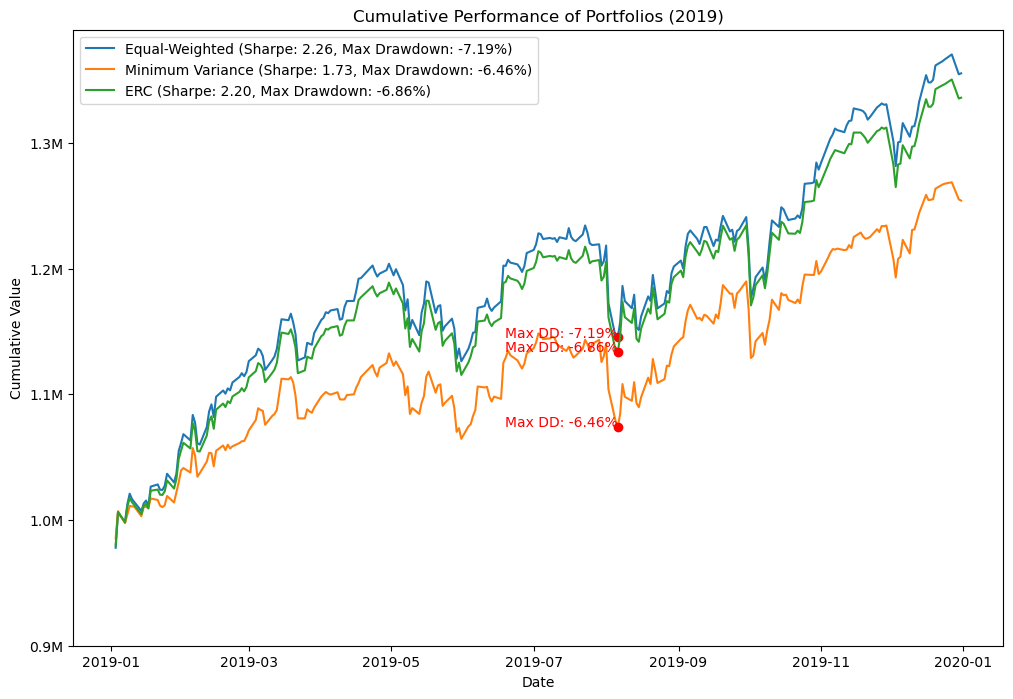

Performance of Equal-Weighted Strategy:
Annualized Volatility: 14.39%
Sharpe Ratio: 2.26
Maximum Drawdown: -7.19%
--------------------------------------------------
Performance of Minimum Variance Strategy:
Annualized Volatility: 12.93%
Sharpe Ratio: 1.73
Maximum Drawdown: -6.46%
--------------------------------------------------
Performance of ERC Strategy:
Annualized Volatility: 13.90%
Sharpe Ratio: 2.20
Maximum Drawdown: -6.86%
--------------------------------------------------
The weights for a Minimum Variance portfolio are: [6.4456708212150356e-18, 0.19804166091475447, 0.08100258455633783, 0.22123290778804924, 1.000834045339616e-17, 3.430443664561946e-18, 0.2519350444088854, 0.073543899630516, 0.1216326027612817, 0.052611299940175424]
The weights for an Equal Risk Contribution (ERC) portfolio are: [0.08665366 0.11549422 0.11433038 0.11503493 0.07868983 0.06801732
 0.11469386 0.09114227 0.09905546 0.11688808]
1335969.1837928947


In [62]:

# Calculate daily returns for each strategy

# Equal-Weighted Strategy
equal_weights = np.repeat(1 / 10, 10) 
portfolio_daily_returns_equi = daily_returns_2019.dot(equal_weights)

# Minimum Variance Strategy
weights_min_var = minimum_variance(daily_returns_2017_2018)
portfolio_daily_returns_min_var = daily_returns_2019.dot(weights_min_var)

# Equal Risk Contribution (ERC) Strategy
cov_matrix_2017_2018 = daily_returns_2017_2018.cov()
weights_erc = calc_weights_erc(cov_matrix_2017_2018)
portfolio_daily_returns_erc = daily_returns_2019.dot(weights_erc)

strategy_equi = Strategy("Equal-Weighted", portfolio_daily_returns_equi)
strategy_min_var = Strategy("Minimum Variance", portfolio_daily_returns_min_var)
strategy_erc = Strategy("ERC", portfolio_daily_returns_erc)

# Plot the cumulative performance of all strategies
fig, ax = plt.subplots(figsize=(12, 8))

for strategy in [strategy_equi, strategy_min_var, strategy_erc]:
    strategy.plot(ax)

ax.set_title("Cumulative Performance of Portfolios (2019)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Value")
ax.legend()
plt.show()

# Print performance metrics for each strategy
for strategy in [strategy_equi, strategy_min_var, strategy_erc]:
    print(f"Performance of {strategy.name} Strategy:")
    print(f"Annualized Volatility: {strategy.annual_volatility():.2%}")
    print(f"Sharpe Ratio: {strategy.sharpe_ratio():.2f}")
    print(f"Maximum Drawdown: {strategy.max_drawdown()[0]:.2%}")
    print("-" * 50)
print(f"The weights for a Minimum Variance portfolio are: {weights_min_var}")
print(f"The weights for an Equal Risk Contribution (ERC) portfolio are: {weights_erc}")

print(strategy_erc.cumulative_values.iloc[-1])

